In [33]:
#program1 Find S
f = open('ds1.csv','r')
length = len(f.readline().split(','))
hypo = ['0']*(length-1)
print('Intital Hypo = ',hypo)
f.close()
f = open('ds1.csv','r')
count =1
for line in f:
    lst = line.split(',')
    for i in range(length-1):
        if(lst[-1] == 'yes\n'):
            if(hypo[i]!='0' and lst[i]!=hypo[i]):
                hypo[i]='?'
            else:
                hypo[i] = lst[i]
    print('Hypo ',hypo)
print('final hypo ',hypo)

Intital Hypo =  ['0', '0', '0', '0', '0', '0']
Hypo  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
Hypo  ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Hypo  ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Hypo  ['sunny', 'warm', '?', 'strong', 'warm', 'same']
final hypo  ['sunny', 'warm', '?', 'strong', 'warm', 'same']


In [35]:
#program 2 Candidate elimination
f = open('ds1.csv','r')
length = len(f.readline().split(',')) -1
f.close()
f = open('ds1.csv','r')
shypo = ['0']*(length)
ghypo =['?']*(length)
print('Intital Specific hypothesis',shypo)
count = 1
print('Intital General hypothesis',ghypo)
ghypo.clear()
for line in f:
    lst = line.split(',')
    for i in range(length):
        if(lst[-1] == 'yes\n'):
            if shypo[i]!='0' and shypo[i]!=lst[i]:
                shypo[i] ='?'
            else:
                shypo[i] = lst[i]
        elif (lst[-1] == 'no\n'):
            if '0' in shypo:
                temp_lst = ['?']*i
                temp_lst += [lst[i]]
                temp_lst += ['?'] * (length-1-i)
                ghypo.append(temp_lst)
            elif shypo[i]!='?' and shypo[i]!=lst[i]:
                temp_lst = ['?']*i
                temp_lst = temp_lst + [shypo[i]]
                temp_lst = temp_lst + ['?'] * (length-1-i)
                if(temp_lst not in ghypo):
                    ghypo.append(temp_lst)
    print('SHYPO ',count ," ",shypo)
    print('GHYPO ',count ," ",ghypo)
    count+=1
f_ghypo = list()
for i in range(len(ghypo)):
    for j in range(len(ghypo[i])):
        if(ghypo[i][j]!='?' and ghypo[i][j]==shypo[j]):
            f_ghypo.append(ghypo[i])
print(f_ghypo)

Intital Specific hypothesis ['0', '0', '0', '0', '0', '0']
Intital General hypothesis ['?', '?', '?', '?', '?', '?']
SHYPO  1   ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
GHYPO  1   []
SHYPO  2   ['sunny', 'warm', '?', 'strong', 'warm', 'same']
GHYPO  2   []
SHYPO  3   ['sunny', 'warm', '?', 'strong', 'warm', 'same']
GHYPO  3   [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
SHYPO  4   ['sunny', 'warm', '?', 'strong', 'warm', 'same']
GHYPO  4   [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]


In [43]:
#program3 decision tree
import numpy as np
import pandas as pd

def entropy(target_col):
    val,counts = np.unique(target_col,return_counts = True)
    ent = sum( (-counts[i]/np.sum(counts)) * np.log2( counts[i]/np.sum(counts) ) for i in range(len(val)))
    return ent

def infoGain(data,features,target):
    te = entropy(data[target])
    val,counts = np.unique(data[features],return_counts = True)
    eg = sum((counts[i]/sum(counts)) * entropy(data[data[features] == val[i]][target] ) for i in range(len(val)))
    InfoGain = te-eg
    return InfoGain
def ID3(data,features,target,pnode):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    elif len(features) == 0:
        return pnode
    else:
        pnode = np.unique(data[target])[np.argmax(np.unique(data[target])[1])]
        IG = [infoGain(data,f,target) for f in features]
        index = np.argmax(IG)
        col = features[index]
        tree = {col:{}}
        features = [f for f in features if f!=col]
        for val in np.unique(data[col]):
            sub_data = data[data[col]==val].dropna()
            subtree = ID3(sub_data,features,target,pnode)
            tree[col][val] = subtree
        return tree

data = pd.read_csv('PlayTennis.csv')
testData = data.sample(frac = 0.1)
data.drop(testData.index,inplace = True)
print(data)
target = 'PlayTennis'
features = data.columns[data.columns!=target]
tree = ID3(data,features,target,None)
print (tree)
test = testData.to_dict('records')[0]
print(test,'=>', test['PlayTennis'])


     Outlook Temperature Humidity    Wind PlayTennis
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No
{'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
{'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak', 'PlayTennis': 'No'} => No


In [44]:
#program4 back propagation
import numpy as np # numpy is commonly used to process number array
X = np.array([[2,9], [3,6], [4,8]]) # Features ( Hrs Slept, Hrs Studied)
y = np.array([[92], [86], [89]]) # Labels(Marks obtained)
X = X/np.amax(X,axis=0) # Normalize
y = y/100
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
    return x * (1 - x)
# Variable initialization
epoch=1000 #Setting training iterations
eta =0.1 #Setting learning rate (eta)
input_neurons = 2 #number of features in data set
hidden_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons)) # 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) # 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) # 1x1
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    #Forward Propogation
    h_ip=np.dot(X,wh) + bh # Dot product + bias
    h_act = sigmoid(h_ip) # Activation function
    o_ip=np.dot(h_act,wout) + bout
    output = sigmoid(o_ip)
    # Error at Output layer
    Eo = y-output # Error at o/p
    outgrad = sigmoid_grad(output)
    d_output = Eo* outgrad # Errj=Oj(1-Oj)(Tj-Oj)
    # Error at Hidden later
    Eh = np.dot(d_output,wout.T) # .T means transpose
    hiddengrad = sigmoid_grad(h_act) # How much hidden layer wts contributed to error
    d_hidden = Eh * hiddengrad
    
    wout += np.dot(h_act.T,d_output) *eta # Dotproduct of nextlayererror and currentlayerop
    wh += np.dot(X.T,d_hidden) *eta

print("Normalized Input: \n" ,X)
print("Actual Output: \n" ,y)
print("Predicted Output: \n" ,output)


Normalized Input: 
 [[0.5        1.        ]
 [0.75       0.66666667]
 [1.         0.88888889]]
Actual Output: 
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.88832521]
 [0.8873855 ]
 [0.89414278]]


In [47]:
#program5 Naive bayesion classifier
import pandas as pd
mush = pd.read_csv('mushrooms.csv')
target = 'class'
classes = mush[target].unique()
features = mush.columns[mush.columns!=target]
testData = mush.sample(frac=0.3)
mush.drop(testData.index,inplace = True)
first ={}
fourth ={}
for x in classes:
    mushcl = mush[mush[target]==x][features]
    tot = len(mushcl)
    second={}
    for col in mushcl.columns:
        third={}
        for val,cnt in mushcl[col].value_counts().iteritems():
            prob = cnt/tot
            third[val]=prob
            second[col]=third
    first[x]=second
    fourth[x]=len(mushcl)/len(mush)
def proabs(params):
    proab={}
    for x in classes:
        calc = fourth[x]
        for col, val in params.iteritems():
            try:
                calc = first[x][col][val]
            except KeyError:
                calc =0
        proab[x]=calc
    return proab
def maxx(params):
    proab = proabs(params)
    maxcl =''; maxv=0
    for col,val in proab.items():
        if(val>maxv):
            maxv=val
            maxcl=col
    return maxcl

b=[]
for i in mush.index:
    b.append(   maxx(mush.loc[i,features]) == mush.loc[i,target]
            )
print(sum(b),'correct of',len(b))
print('Accuracy =',sum(b)/len(b))
b=[]
for i in testData.index:
    b.append(   maxx(testData.loc[i,features]) == testData.loc[i,target]
            )
print(sum(b),'correct of',len(b))
print('Accuracy =',sum(b)/len(b))

3920 correct of 5687
Accuracy = 0.6892913662739582
1688 correct of 2437
Accuracy = 0.6926549035699631


In [50]:
#Program6 Naive Bayesian Classifier
import pandas as pd
msg=pd.read_csv('naive.csv',names=['message','label'])
print('The dimensions of the dataset',msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
print(X)
print(y)
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
#output of count vectoriser is a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
print(count_vect.get_feature_names())

df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())
print(df)#tabular representation
print(xtrain_dtm) #sparse matrix representation
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)
#printing accuracy metrics
from sklearn import metrics
print('Accuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('Recall and Precison ')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

The dimensions of the dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17   

In [51]:
#programs7 BayesianNetwork
import pandas as pd
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
f=open('data7_name.csv','r')
attributes= f.readline().split(',')
heartDisease=pd.read_csv('data7.csv',names=attributes)
print("\nAttributes and datatypes")
print(heartDisease.dtypes)
model=BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease')])
model.fit(heartDisease,BayesianEstimator)
HeartDisease_infer=VariableElimination(model)
print("\n 1. Probability heart disease given age=28")
q=HeartDisease_infer.query(['heartdisease'],{'age':28})
print(q['heartdisease'])
print("\n 2. Probability of heart disease for male")
q=HeartDisease_infer.query(['heartdisease'],{'sex':1})
print(q['heartdisease'])

ModuleNotFoundError: No module named 'pgmpy'

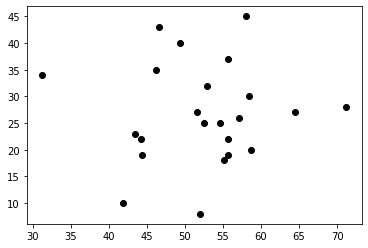

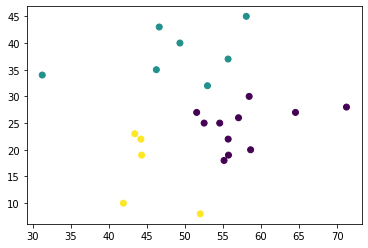

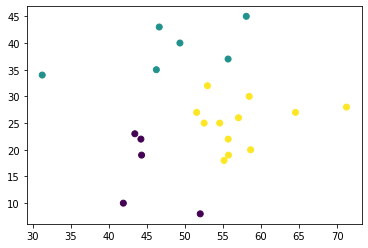

In [54]:
#program 8 kmeans
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('8-kmeansdata.csv')
f1 =data['Distance_Feature']
f2=data['Speeding_Feature']
X =np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,color='black')
plt.show()
kmeans = KMeans(3).fit(X)
labels = kmeans.predict(X)
plt.scatter(f1,f2,c=labels)
plt.show()
gm = GaussianMixture(3).fit(X)
labels = gm.predict(X)
plt.scatter(f1,f2,c=labels)
plt.show()

In [55]:
#PROGRAM 9 KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target)
classifier = KNeighborsClassifier(3).fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Results of Classification using K-nn with K=1 
 Sample: [6.7 3.3 5.7 2.1]  Actual-label: 2  Predicted-label: 2
 Sample: [6.7 3.1 4.7 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [5.4 3.4 1.7 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [7.2 3.2 6.  1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [5.5 2.6 4.4 1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [6.5 3.  5.5 1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [7.2 3.6 6.1 2.5]  Actual-label: 2  Predicted-label: 2
 Sample: [4.7 3.2 1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.9 3.2 4.8 1.8]  Actual-label: 1  Predicted-label: 2
 Sample: [6.4 3.2 5.3 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [4.6 3.1 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.4 2.9 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.9 3.  1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.3 2.5 4.9 1.5]  Actual-label: 1  Predicted-label: 2
 Sample: [6.3 2.8 5.1 1.5]  Actua

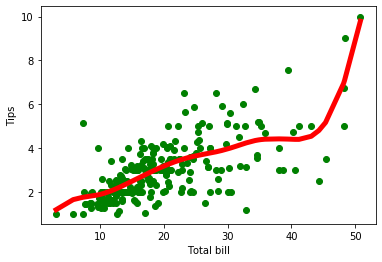

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def localWeigh(point,X,ymat,k):
    m,n = np.shape(X)
    weights = np.mat(np.eye(m))
    for i in range(m):
        diff = point - X[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*k**2))
    W = (X.T *(weights*X)).I * (X.T*(weights*ymat.T))
    return W
def localWeightReg(X,ymat,k):
    m,n = np.shape(X)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = X[i] * localWeigh(X[i],X,ymat,k)
    return ypred
def plott(X,pred):
    sortIndex = X[:,1].argsort(0)
    xsort = X[sortIndex][:,0][:,1]
    ysort = pred[sortIndex]
    plt.scatter(x,y,color='green')
    plt.plot(xsort,ysort,color="red",linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tips')
    plt.show()

data = pd.read_csv('data10.csv')
x=data['total_bill']
y = data['tip']
xmat = np.mat(x)
ymat = np.mat(y)
size = np.shape(xmat)[1]
ones = np.mat(np.ones(size))
X=np.hstack((ones.T,xmat.T))
pred = localWeightReg(X,ymat,3)
plott(X,pred)